# Week 6 Assignment

## Description


This week you will begin a final project in this course broken up over different assignments in the last three weeks. Choose a machine learning appropriate dataset and import it into Python using Pandas or NumPy. If you are using a classification dataset, your target must be one-hot encoded. You will need to import the dataset so it is compatible with Scikit-learn/Keras, and it may not be one we have used previously in class. Finish this assignment by splitting the dataset into training and testing sets.

## Introduction


Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research, but in order to do that, there is a critical condition to be sorted out, findinfinding the right dataset to test and build predictive models.

That is a key aspect and a common problem in Machine Learning. Fortunately, the <a href="https://keras.io/datasets/">Keras.Datasets</a> module already includes methods to load and fetch popular reference datasets. Here's the list of available datasets:

<ul>
  <li><b>boston_housing module:</b> Boston housing price regression dataset.</li>
  <li><b>cifar10 module:</b> CIFAR10 small images classification dataset (classification of 10 image labels).</li>
  <li><b>cifar100 module:</b> CIFAR100 small images classification dataset (classification of 100 image labels).</li>
  <li><b>fashion_mnist module:</b> Fashion-MNIST dataset (classification of 10 digits).</li>
  <li><b>imdb module:</b> IMDB sentiment classification dataset (classification of 10 fashion categories).</li>
  <li><b>mnist module:</b> MNIST handwritten digits dataset (binary text classification).</li>
  <li><b>reuters module:</b> Reuters topic classification dataset(multiclass text classification).</li>
</ul>

## Implementation


For our purposes, and considering the considerations made on the assignment description, I have choose the CIRFAR10 as Dataset for the upcomming project.

<b><ins>CIFAR10:</ins></b> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset information and details can be found <a href="https://www.cs.toronto.edu/~kriz/cifar.html">here</a>.

he CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.The tech report <a href="https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf">Learning Multiple Layers of Features from Tiny Images, 2009</a> on its Chapter 3, describes the dataset and the methodology followed when collecting it in much greater detail.

Considering that the scope of the present assignment is to load the dataset validating its format and split it into training and testing groups


### Step by Step

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. Even that is not going to be used at this time, it is convenient to consider it since is going to be a vital part of our project.

Also, as described above, we will be using the build-in dataset CIFAR10.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from termcolor import colored

# Showing the shape of the training and testing datasets
def show_shapes(x_train, y_train, x_test, y_test, color='blue'):
    print(colored('Training:', color, attrs=['bold']))
    print('  x_train.shape:', x_train.shape)
    print('  y_train.shape:', y_train.shape)
    print(colored('\nTesting:', color, attrs=['bold']))
    print('  x_test.shape:', x_test.shape)
    print('  y_test.shape:', y_test.shape)
    
def plot_data(my_data, cmap=None):
    plt.axis('off')
    fig = plt.imshow(my_data, cmap=cmap)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    print(fig)

# Showing the x,y array for a sample image    
def show_sample(x_train, y_train, idx=0, color='blue'):
    print(colored('x_train sample:', color, attrs=['bold']))
    print(x_train[idx])
    print(colored('\ny_train sample:', color, attrs=['bold']))
    print(y_train[idx])

    # Showing the image from the x,y array sample previously given    
def show_sample_image(x_train, y_train, idx=0, color='blue', cmap=None):
    print(colored('Label:', color, attrs=['bold']), y_train[idx])
    print(colored('Shape:', color, attrs=['bold']), x_train[idx].shape)
    print()
    plot_data(x_train[idx], cmap=cmap)

    
# Declare variables
num_classes = 10
class_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','trunk']

# Declare Sequential Model
#model = Sequential()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


Now, we are going to load CIFAR10 dataset into our model, obtaining two tuples of Numpy arrays: 

<b><i> (x_train, y_train), (x_test, y_test). </i></b>


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

show_shapes(x_train, y_train, x_test, y_test)

Training:
('  x_train.shape:', (50000, 32, 32, 3))
('  y_train.shape:', (50000, 1))

Testing:
('  x_test.shape:', (10000, 32, 32, 3))
('  y_test.shape:', (10000, 1))


x_train sample:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

y_train sample:
[6]

------------------------------


Image index 0

('\x1b\x1bLabel:\x1b', array([6], dtype=uint8))
('\x1b\x1bShape:\x1b', (32, 32, 3))
()
AxesImage(54,36;334.8x217.44)


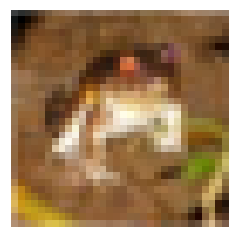

In [8]:
show_sample(x_train, y_train)
print '\n' + 30*'-' + '\n'
print '\nImage index 0\n'
show_sample_image(x_train, y_train)

x_train sample:
[[[213 229 242]
  [211 227 240]
  [211 227 240]
  ...
  [151 174 206]
  [151 174 206]
  [149 172 204]]

 [[214 229 241]
  [212 227 239]
  [212 227 239]
  ...
  [152 175 207]
  [152 175 207]
  [151 174 205]]

 [[216 229 239]
  [214 227 237]
  [213 227 237]
  ...
  [153 176 206]
  [153 176 206]
  [151 174 204]]

 ...

 [[145 159 165]
  [136 148 154]
  [143 152 158]
  ...
  [216 217 206]
  [196 197 191]
  [183 183 182]]

 [[139 153 159]
  [129 142 148]
  [129 139 145]
  ...
  [227 228 219]
  [223 224 219]
  [209 209 209]]

 [[137 152 157]
  [143 155 161]
  [136 145 152]
  ...
  [209 209 203]
  [217 217 213]
  [228 228 226]]]

y_train sample:
[8]

------------------------------


Image index 1000

('\x1b\x1bLabel:\x1b', array([9], dtype=uint8))
('\x1b\x1bShape:\x1b', (32, 32, 3))
()
AxesImage(54,36;334.8x217.44)


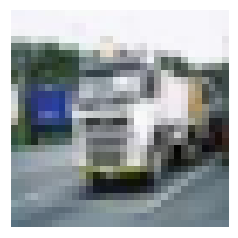

In [9]:
show_sample(x_train, y_train,100)
print '\n' + 30*'-' + '\n'
print '\nImage index 1000\n'
show_sample_image(x_train, y_train,1000)

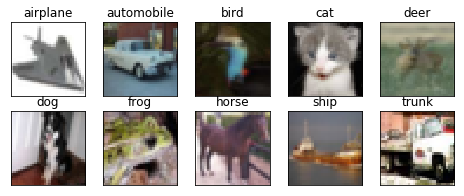

In [10]:
# Print figure with 10 random images from cifar dataset
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(0,1,2))
    ax.set_title(class_label[i])
    plt.imshow(im)
plt.show()

## Conclusion
We understand that loading the CIFAR10 dataset we obtain:

<ul>
  <li><b><i>x_train and x_test</b></i>
    <ul>
      <li>uint8 array of RGB image data with shape (num_samples, 32, 32, 3).</li>
    </ul>
  </li>
  <li><b><i>y_train and y_test</b></i>
    <ul>
      <li>uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).</li>
    </ul>
  </li>
</ul>

We can see also that the pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

## Next Steps

<ul>
  <li><b>Data Normalization:</b> Bormalize the label data (Y axis) to ensure the proper manipulation on the model.</li>
  <li><b>Model Definition:</b> Model definition based on targets.</li>
</ul>